## 第57课 应用ANN+SMOTE+Keras Tuner算法进行信用卡交易欺诈侦测

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


1. Application - credit card fraud detection
2. unbalance data processing with SMOTE - oversampling 参见37，38节课分享
3. ANN processing 
4. ANN with Keras Tuner 寻参 - another env 参见56节课分享

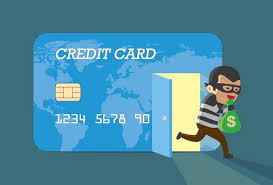

In [34]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson57-Fraud D.JPG')

In [35]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('Lesson37-creditcard.csv',sep=',')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler
data['Amount(Normalized)'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.iloc[:,[29,31]]

,Amount,Amount(Normalized)
0,149.62,0.244964
1,2.69,-0.342475
2,378.66,1.160686
3,123.50,0.140534
4,69.99,-0.073403
...,...,...
284802,0.77,-0.350151
284803,24.79,-0.254117
284804,67.88,-0.081839
284805,10.00,-0.313249


In [6]:
data = data.drop(columns = ['Amount', 'Time'], axis=1) # This columns are not necessary anymore.

In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
X_train.shape

(199364, 29)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
______________________________________________________

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 12s 62us/step - loss: 0.0113 - accuracy: 0.9982
Epoch 2/5
199364/199364 [==============================] - 12s 61us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 11s 56us/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
199364/199364 [==============================] - 11s 57us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 11s 57us/step - loss: 0.0032 - accuracy: 0.9994


In [15]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

85443/85443 [==============================] - 2s 20us/step
Test Accuracy: 99.95%
Test Loss: 0.0024937106810595817


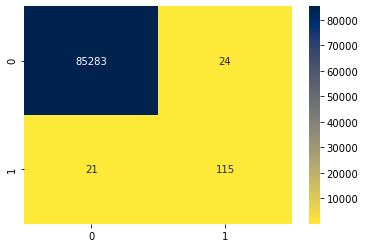

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

### SMOTE Sampling

In [18]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_sample(X, y)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 30, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 23s 59us/step - loss: 0.0291 - accuracy: 0.9904
Epoch 2/5
398041/398041 [==============================] - 25s 63us/step - loss: 0.0109 - accuracy: 0.9972
Epoch 3/5
398041/398041 [==============================] - 23s 59us/step - loss: 0.0091 - accuracy: 0.9977
Epoch 4/5
398041/398041 [==============================] - 23s 58us/step - loss: 0.0079 - accuracy: 0.9981
Epoch 5/5
398041/398041 [==============================] - 23s 59us/step - loss: 0.0076 - accuracy: 0.9982


In [20]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

170589/170589 [==============================] - 3s 20us/step
Test Accuracy: 99.79%
Test Loss: 0.008372916505159264


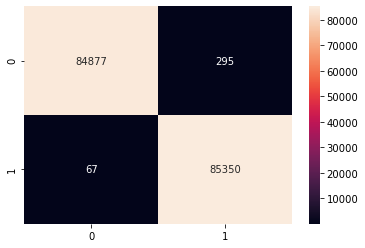

In [21]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

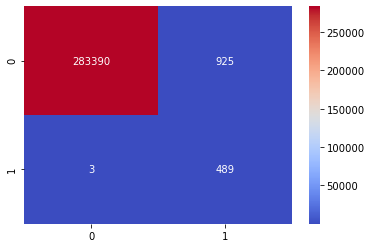

In [22]:
y_pred2 = model.predict(X)
y_test2 = pd.DataFrame(y)
cm2 = confusion_matrix(y_test2, y_pred2.round())
sns.heatmap(cm2, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [23]:
scoreNew = model.evaluate(X, y)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))

284807/284807 [==============================] - 6s 22us/step
Test Accuracy: 99.67%
Test Loss: 0.01322028800950512


In [24]:
print(classification_report(y_test2, y_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.35      0.99      0.51       492

    accuracy                           1.00    284807
   macro avg       0.67      1.00      0.76    284807
weighted avg       1.00      1.00      1.00    284807



In [11]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 10 Complete [00h 10m 21s]
val_accuracy: 0.9994499087333679

Best val_accuracy So Far: 0.999555230140686
Total elapsed time: 00h 52m 18s
INFO:tensorflow:Oracle triggered exit


In [15]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 6
units_0: 320
units_1: 352
learning_rate: 0.0001
units_2: 384
units_3: 64
units_4: 32
units_5: 64
units_6: 256
units_7: 96
units_8: 32
units_9: 384
units_10: 352
units_11: 512
units_12: 352
units_13: 96
units_14: 480
units_15: 96
units_16: 448
units_17: 448
units_18: 320
units_19: 64
Score: 0.999555230140686
Trial summary
Hyperparameters:
num_layers: 16
units_0: 384
units_1: 256
learning_rate: 0.001
units_2: 288
units_3: 288
units_4: 96
units_5: 224
units_6: 64
units_7: 64
units_8: 128
units_9: 480
units_10: 96
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 0.9995084404945374
Trial summary
Hyperparameters:
num_layers: 19
units_0: 64
units_1: 64
learning_rate: 0.0001
units_2: 320
units_3: 192
units_4: 128
units_5: 448
units_6: 96
units_7: 352
units_8: 160
units_9: 128
units_10: 64
units_11: 384
units_12: 

In [14]:
import tensorflow
print(tensorflow.__version__)

2.3.0
